# Mozgásegyenlet megoldása 1 dimenzióban (egyenes menti mozgások)

Ez a notebook különböző egyenes menti erőhatások esetén numerikusan megodlja a mozgásegyenletet.

Az erők ismeretében már tudjuk a gyorsulás aktuális értékét. Innen pedig az előző alkalommal használt számítások logikáját követjük.
Tehát kiválasztott $\Delta t$ időlépésekben ki tudjuk számítani a   
- pillanatnyi sebesség és
- hely adatokat
- Illetve ezeket tudjuk ábrázolni az idő függvényében


## Elmélet

### Emlékeztetőül

Gyorsulás adatokból sebesség: $\boxed{v_i= v_{i-1}+a_i\cdot \Delta t}$

Sebesség adatokból helyzet: $\boxed{x_i= x_{i-1}+v_i\cdot \Delta t}$

Ehhez persze kell egy ismert $v_0$ kezdő sebesség és $x_0$ kezdő helyzet! (**kezdeti feltételek**)

### Newton törvények alapján a mozgásegyenlet

**Model**: pontszerű test
$$\boxed{\sum\vec{F}=m \cdot \vec{a}}$$

- Az egyes kölcsönhatásokat egy-egy F erővel tudjuk leírni (erőtörvények), amelyek vektori módon összegződnek. (egynes mentén előjelesen!)
- Az így kapott eredő erő okozza a test gyorsulását.
- Ez a gyorsulás arányos az eredő erővel és
- az arányossági tényező a testre jellemző állandó, amit tömegnek hívunk.

### Néhány hasznos erőtörvény

Ezeket kísérleteket elemezve kapjuk, a Newton törvények nem mondják meg.

- Nehézségi erő a Földfelszín közelében: $ \vec{F}=m \cdot \vec{g} $
- Rugóban ébredő erő (egyenes mentén): $ F=-D \cdot x $
- Közegellenállás kis sebességek: $\vec{F}=-C\cdot \vec{v}$
- Közegellenállás nagy sebességek: $ \vec{F}=-C\cdot \vec{v}\cdot |\vec{v}|$  pontosabban  $ \vec{F}=-\frac{1}{2}\cdot C\cdot \rho \cdot A \cdot \vec{v}\cdot |\vec{v}|$, ahol $C$ az alaktényező, $\rho$ a közeg sűrűsége, $A$ a homlokfelület (mozgásirányra merőleges felület).
- Csúszási súrlódás: felületet összenyomó erővel arányos nagyságú mozgást akadályozó $F=\mu_0\cdot N$



## Egyszerű mozgásegyenlet-megoldó

### A szükséges csomagok importálása

In [1]:
import numpy as np                 # Numpy  csomag - numerikus számítások
import matplotlib.pyplot as plt    # MatPlotLib - ábrázolás
%matplotlib inline

### A léptetés megvalósítása függvénnyel
Mik a releváns paraméterek?

- aktuális helyzet $x$
- aktuális sebesség $v$
- erők eredője: $F$ függhet a tömegtől, sebességtől, helyzettől.
- tömeg, mert a gyorsulás $a=\dfrac{F}{m}$,
- időlépés: $\Delta t$

Mit ad meg a függvény?
- az új, $\Delta t$ idővel későbbi helyzetet és sebességet

In [2]:
# Egyszerű, józan eszes léptetés: x és v értékek számítása gyorsulás alapján
# F(xt,vt,m)

def lepes(xt, vt, dt, F, m):

    at = F(xt, vt, m) / m       # gyorsulás mozgásegyenletből
    v_new = vt + at * dt        # új sebesség
    x_new = xt + v_new * dt     # új helyzet
    return (x_new , v_new)

In [33]:
# Néhány eredő erő erőfüggvénye
# Alakra megfelel a léptetésnél használt erőfüggvény alaknak

# F(xt,vt,m)

# 1D rugóerő -------------------------------------
def F_rugo(x, v, m):
    D = 50.0
    return -D*x

# szabadesés közegellenállással -------------------
def F_eses(x, v, m):
    g = 9.81  # grav gyorsulás
    C = 0.47  # alaktényező
    A = 0.01  # keresztmetszet mozgásirányban
    rho = 1.2 # közeg sűrűség
    F = -m * g
    if abs(v) > 0:
        F -= 0.5 * C * A * rho * v * abs(v)
    return F

def F_rugo_kozeg(x, v, m):
    D = 50.0
    g = 9.81  # grav gyorsulás
    C = 0.47  # alaktényező
    A = 0.1  # keresztmetszet mozgásirányban
    rho = 1.2 # közeg sűrűség
    F = -D*x
    if abs(v) > 0:
        F -= 0.5 * C * A * rho * v * abs(v)
    return F

## Harmonikus rezgőmozgás (F_rugo)

In [4]:
# kezdőértékek: kezdeti hely, sebesség ...
x0 = 0.0     # kezdeti hely
v0 = 2.0     # kezdő sebesség
m = 16.0     # tömeg
dt = 0.01    # időlépés
t_max = 5.0  # végső időpont
t0 = 0.0     # kezdeti időpont

# változók inicializálása
t, x, v = t0, x0, v0

# Mi legyen az erő függvény?
F = F_rugo

In [5]:
# listákba gyűjtjük az eredményt
t_list = []
x_list = []
v_list = []

In [6]:
# tényleges futtatás CIKLUS
while (t <= t_max):
    x_list.append(x)
    v_list.append(v)
    x, v = lepes(x, v, dt, F, m)      #hely és sebesség léptetése F_eredo erőfüggvénnyel

    t_list.append(t)
    t += dt                             # idő léptetése

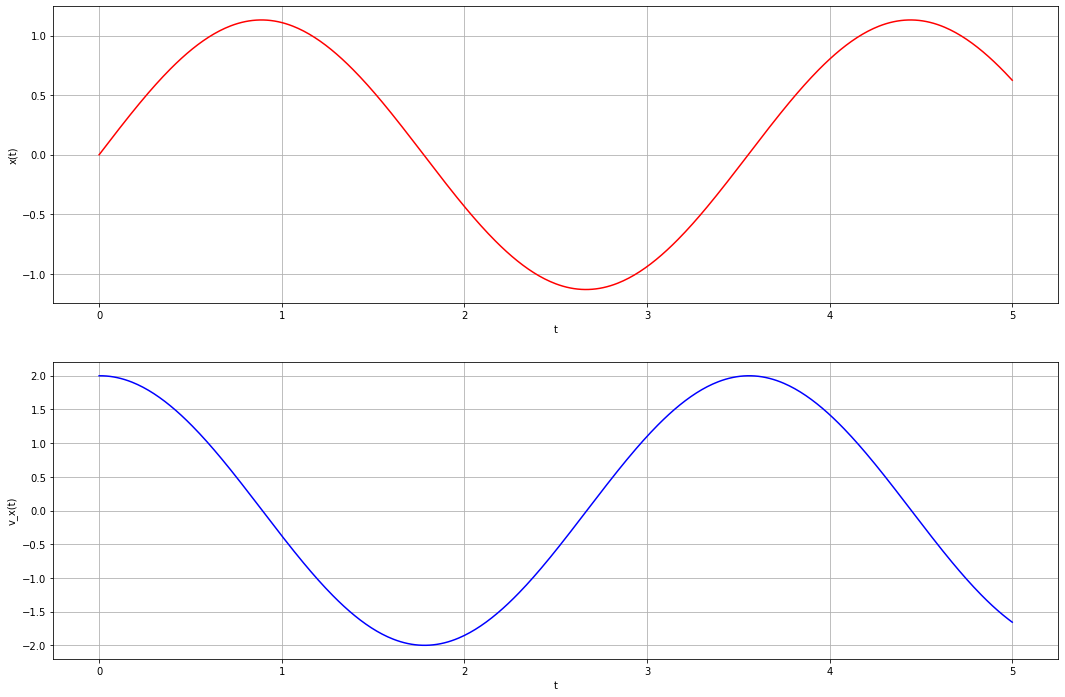

In [7]:
# most kirajzoljuk: egy ábrán több grafikon
fig = plt.figure(figsize=(18,12))
# két rész-grafikon
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.plot(t_list, x_list, color = "red") # az elsőbe az rx(t)
ax2.plot(t_list, v_list, color = "blue") # a másodikba a vx(t)
# grafikonok testreszabása
ax1.grid()
ax2.grid()
ax1.set_xlabel("t")
ax1.set_ylabel("x(t)")
ax2.set_xlabel("t")
ax2.set_ylabel("v_x(t)")
plt.show()

## Szervezzük ki ezt az munkafolyamatot függvények segítségével

- Egy függvény, ami elvégzi a számolást (eredménye az idő, hely sebesség adatok)
- És egy másik ami listák/tömbök alapján ábrázol

### Számoló függvény

Mik a számoló függvény paraméterei?
- kezdeti hely,kezdő sebesség
- időlépés, végső időpont
- tömeg
- használandó erőfüggvény (Előző F_rugo helyett tetszőleges F)

Mi legyen a visszatérési érték?
- idő adatok
- hely adatok
- sebesség adatok

In [8]:
def data_x_v(x0, v0 ,dt ,t_max, m, F):
    t0 = 0.0

    # változók inicializálása
    t,x,v = t0, x0, v0

    # listákba gyűjtjük az eredményt
    t_list=[]
    x_list=[]
    v_list=[]

    # tényleges futtatás CIKLUS
    while (t <= t_max):
        x_list.append(x)
        v_list.append(v)
        x , v = lepes(x,v,dt,F,m)       # tetszőleges F függvény

        t_list.append(t)
        t += dt

    # tömbbé alakítjuk az eredményt
    x_arr=np.asarray(x_list)
    v_arr=np.asarray(v_list)
    t_arr=np.asarray(t_list)           # legyen az idő is tömbben

    return t_arr, x_arr, v_arr

### Ábrázoló függvény

Mik az ábrázoló függvény paraméterei?
- idő adatok
- hely adatok
- sebesség adatok

Mi legyen a visszatérési érték?
- semmi
- "mellékahtásként" készüljön el az ábra

In [9]:
def abra_1D_mozgas(t_data,x_data,v_data):
    # most kirajzoljuk: egy ábrán több grafikon
    fig=plt.figure(figsize=(14,8))
    # két rész-grafikon
    ax1=fig.add_subplot(211)
    ax2=fig.add_subplot(212)
    ax1.plot(t_data, x_data, color="red") # az elsőbe az rx(t)
    ax2.plot(t_data, v_data, color="blue") # a másodikba a vx(t)
    # grafikonok testreszabása
    ax1.grid()
    ax2.grid()
    ax1.set_xlabel("t")
    ax1.set_ylabel("x(t)")
    ax2.set_xlabel("t")
    ax2.set_ylabel("v_x(t)")
    plt.show()

### Harmonikus rezgőmozgás újra

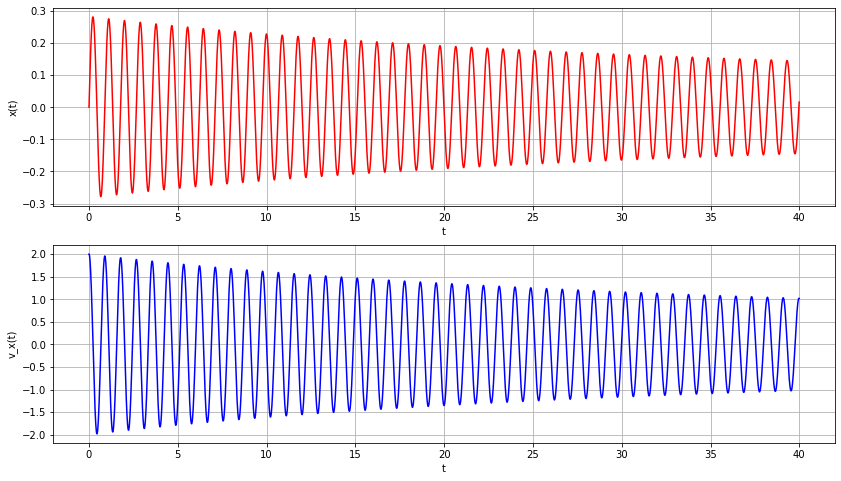

In [31]:
x0 = 0.0     # kezdeti hely
v0 = 2.0     # kezdő sebesség
m = 1.0     # tömeg
dt = 0.01    # időlépés
t_max = 40.0  # végső időpont

t_data,x_data,v_data = data_x_v(x0,v0,dt,t_max, m, F_rugo_kozeg)

abra_1D_mozgas(t_data,x_data,v_data)

### Szabadesés közegellenállással (F_eses)
Kellően hosszú idő alatt a sebesség állandósul

- De mikor következik ez be adott paraméterek esetén?
- Mekkora magasságból esve állandosul a sebesség?

**Játszunk a paraméterekkel**: Mi történik, ha a tömeget változtatom?

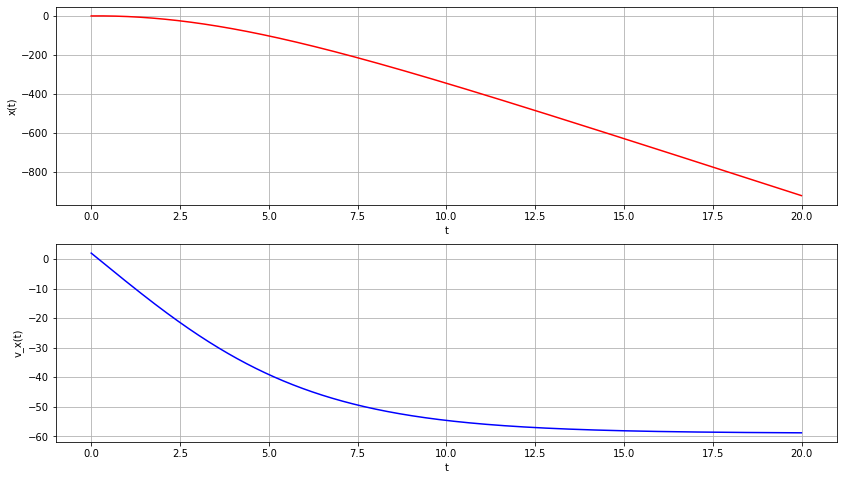

In [34]:
x0 = 0.0     # kezdeti hely
v0 = 2.0     # kezdő sebesség
m = 1.0     # tömeg
dt = 0.01    # időlépés
t_max = 20.0  # végső időpont

t_data, x_data, v_data = data_x_v(x0,v0,dt,t_max, m, F_eses)

abra_1D_mozgas(t_data,x_data,v_data)

## Harmonikus rezgőmozgás
**Játszunk a paraméterekkel** Mi történik ha a tömeget változtatom? Vagy ha az időlépés $dt$ túl nagy?


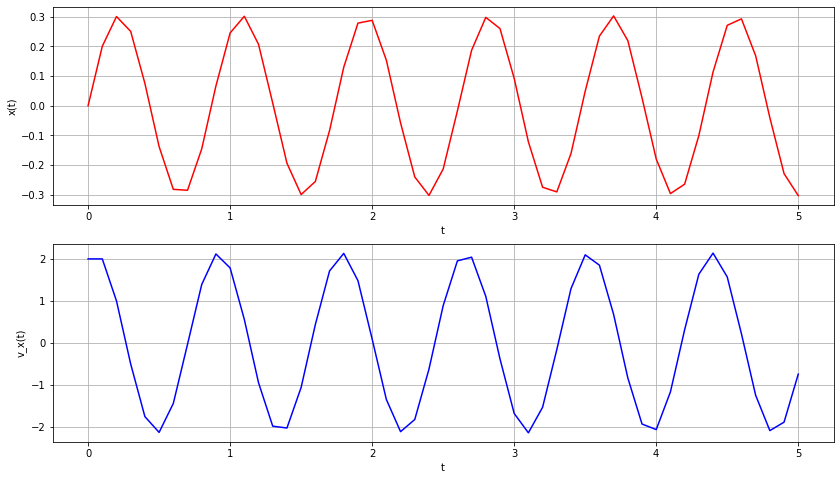

In [12]:
x0 = 0.0     # kezdeti hely
v0 = 2.0     # kezdő sebesség
m = 1.0     # tömeg
dt = 0.1    # időlépés
t_max = 5.0  # végső időpont

t_data,x_data,v_data = data_x_v(x0,v0,dt,t_max, m, F_rugo)
abra_1D_mozgas(t_data,x_data,v_data)

### mekkora a rezgés amplitúdója, maximális sebessége?

In [13]:
x_data.max()   # amplitudo

0.30215752643125615

In [14]:
x_data.min()

-0.30236091873805915

In [15]:
v_data.max()  # maximális sebesség

2.137523784024098

In [16]:
# szebben kiíratva:
print(f"A rezgés amplitúdója: {x_data.max():0.2f} m")
print(f"A rezgés maximális sebessége: {v_data.max():0.2f} m/s")

A rezgés amplitúdója: 0.30 m
A rezgés maximális sebessége: 2.14 m/s


### Mekkora volt a periódusidő?
2 szomszédos maximumhely időbeli távolsága

De hol vannak a maximum helyek?

Ott maximális egy függvény értéke, ahol előtte nőtt, utána pedig csökkent. Azaz $x_i$-ben helyi maximum van, ha:  $x_i> x_{i-1}$ és $x_i > x_{i+1}$.

In [17]:
# x helyi maximumainak kiválasztása
x_loc_max = np.zeros(x_data.shape, dtype=bool)  # x_arr-ral egy méretű bool (logikai) tömb foglalása

# legyen az érték nagyobb, mint az előtte és a utána levő is:
x_loc_max[1:-1] = (x_data[1:-1]>x_data[0:-2])  & (x_data[1:-1] > x_data[2:])
# x_loc_max: ott True, ahol helyi maximum van

# maximumok időpontjai
t_loc_max = t_data[x_loc_max]

print("Maximumhelyek:", t_loc_max)

Maximumhelyek: [0.2 1.1 2.  2.8 3.7 4.6]


In [18]:
# első két max különbsége:
print(f"Első két maximum különbsége: {t_loc_max[1]-t_loc_max[0]:0.7f} s")

Első két maximum különbsége: 0.9000000 s


In [19]:
# tényleg változatlan a periódusidő?
print("Szomszédos maximumok különbsége:",t_loc_max[1:]-t_loc_max[0:-1])

Szomszédos maximumok különbsége: [0.9 0.9 0.8 0.9 0.9]


In [20]:
# pontosabb periódusidő:
T=(t_loc_max[-1]-t_loc_max[0])/(len(t_loc_max)-1)
print(f"Pontosabb periódusidő:{T:0.7f} s")

Pontosabb periódusidő:0.8800000 s


## Csillapodó rezgőmozgás

In [21]:
# 1D rugó, lineáris közegellenállás

def F_rugo_kozeg_lin(r,v,m):
    C_lin = 1.0   #   F_közeg= -C_lin*v
    F=F_rugo(r,v,m) - C_lin*v
    return F


# 1D rugó, négyzetes közegellenállás

def F_rugo_kozeg_negyz(r,v,m):
    C_negyz=0.47
    A = 0.5
    rho = 1.2
    F=F_rugo(r,v,m) - 0.5*C_negyz*A*rho*v*np.abs(v)
    return F


# 1D rugó, súrlódásos fékeződés

def F_rugo_surl(r,v,m):
    mu  = 0.15
    g = 9.81
    if np.abs(v)<1e-10:
        F=F_rugo(r,v,m)
    else:
        F=F_rugo(r,v,m) - mu*m*g*v/(np.abs(v))
    return F

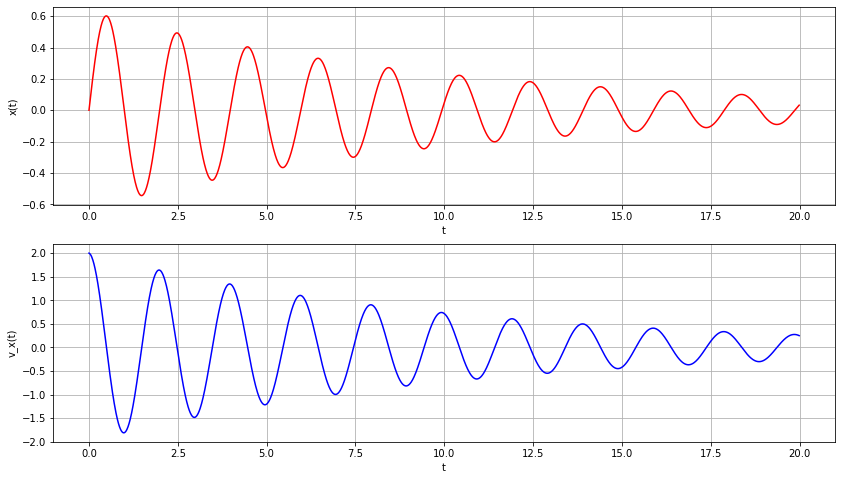

In [22]:
x0 = 0.0     # kezdeti hely
v0 = 2.0     # kezdő sebesség
m = 5.0     # tömeg
dt = 0.01    # időlépés
t_max = 20.0  # végső időpont

t_data,x_data,v_data = data_x_v(x0,v0,dt,t_max, m, F_rugo_kozeg_lin)
abra_1D_mozgas(t_data,x_data,v_data)